In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

***Image Augmentation***

In [ ]:
data_path='/content/drive/MyDrive/dataset/flowerdataset/flowers'
batch_size = 32
target_size = (64, 64)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [ ]:
X_train = train_datagen.flow_from_directory(data_path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            subset="training",
                                            class_mode = 'categorical')



X_test = test_datagen.flow_from_directory(data_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical') 

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Create model

In [ ]:
model = Sequential()

Add Layers

In [ ]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the Model

In [ ]:
model.fit(X_train, steps_per_epoch=100, epochs=20)

Epoch 1/20
100/100 [==============================] - 862s 9s/step - loss: 1.3148 - accuracy: 0.4225
Epoch 2/20
100/100 [==============================] - 80s 807ms/step - loss: 1.1049 - accuracy: 0.5532
Epoch 3/20
100/100 [==============================] - 34s 336ms/step - loss: 1.0491 - accuracy: 0.5898
Epoch 4/20
100/100 [==============================] - 33s 332ms/step - loss: 0.9777 - accuracy: 0.6257
Epoch 5/20
100/100 [==============================] - 30s 303ms/step - loss: 0.9276 - accuracy: 0.6397
Epoch 6/20
100/100 [==============================] - 30s 302ms/step - loss: 0.9164 - accuracy: 0.6497
Epoch 7/20
100/100 [==============================] - 30s 298ms/step - loss: 0.8880 - accuracy: 0.6605
Epoch 8/20
100/100 [==============================] - 31s 305ms/step - loss: 0.8344 - accuracy: 0.6709
Epoch 9/20
100/100 [==============================] - 31s 304ms/step - loss: 0.8159 - accuracy: 0.6829
Epoch 10/20
100/100 [==============================] - 32s 322ms/step - los

Save the Model

In [ ]:
model.save("model.h5")

Test the Model

In [ ]:
def predict():
    img = image.load_img("/content/drive/MyDrive/dataset/flowerdataset/flowers/rose/118974357_0faa23cce9_n.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("/content/drive/MyDrive/dataset/flowerdataset/flowers/rose/118974357_0faa23cce9_n.jpg"))
    plt.axis('off')
    plt.show()

The given image is a rose


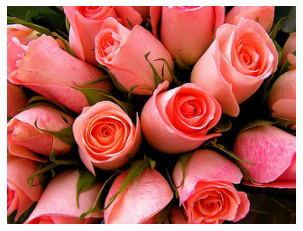

In [ ]:
predict()